## Input & Output

### Ex1

In [ ]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

app = dash.Dash()
app.layout = html.Div([
    
    html.H2(id='Input H2', 
            children=['Input']),
    dcc.Input(id='Input', 
              value='Text Input'),
    html.Br(),
    html.Br(),

    html.H2(id='Output H2',
            children=['Output']),
    html.Div(id='div Output',
             children=['No Text'])

])

@app.callback(Output(component_id='div Output', 
                     component_property='children'),
              Input(component_id='Input', 
                     component_property='value'))
def callback(input_value):
    return 'The Input Text : {}'.format(input_value)


if __name__ == '__main__':
    app.run_server(debug=True)  

### Ex2

In [ ]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

options = [
    {'label': '딸기', 'value': '7000'},
    {'label': '수박', 'value': '20000'},
    {'label': '바나나', 'value': '4000'},
    {'label': '키위', 'value': '3000'},
    {'label': '사과', 'value': '5000'},
    ]

app = dash.Dash()
app.layout = html.Div([

    html.H3(id='H3_1',
            children=['Label']),
    dcc.Dropdown(id='Dropdown',
                 options=options,
                 ),
    html.Br(),
    html.Br(),
    html.H3(id='H3_2',
            children=['Value']),
    html.Div(id='div Output',
             children=['Price'])

])

@app.callback(Output(component_id='div Output', 
                     component_property='children'),
              Input(component_id='Dropdown', 
                     component_property='value')) # jupyet notebook에서 받는 값 
def callback(input_value):
    return 'The Input Text : {}'.format(input_value)


if __name__ == '__main__':
    app.run_server(debug=True)

### Ex3

In [29]:
import plotly.graph_objs as go
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
import numpy as np

app = dash.Dash()
app.layout = html.Div([

    html.H2(id='H2',
            children=['Input & Output Example 2']),
    dcc.Input(id='Input',
              value=5),
    html.Br(),
    html.Br(),
    dcc.Graph(id='graph')

])

# component_id, component_property 생략 가능 
@app.callback(Output('graph', 'figure'),
              Input('Input', 'value'))
def set_num(num):
    num = int(num) # web에서 받는 값은 str이므로 int로 변환
    ran_1 = np.random.randint(1, 500, num)
    ran_2 = np.random.randint(1, 1500, num)

    trace = go.Scatter(x=ran_1,
                       y=ran_2,
                       mode='markers')
    layout = go.Layout(title='Random Number Graph N:{}'.format(num))
    fig = go.Figure(data=[trace], layout=layout)
    return fig    

if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
ValueError: invalid literal for int() with base 10: ''



## MultipleInput

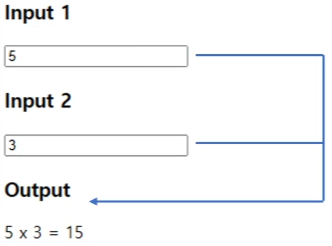

In [38]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output

app = dash.Dash()
app.layout = html.Div([

    # input1
    html.Div(id='Div1',
             children=[
                html.H3(id='H3_Input1',
                        children=['Input 1']),
                dcc.Input(id='input1',
                          value='입력값 1') # int 값 넣으면 시작 오류 안남

             ]),
    # input2
    html.Div(id='Div2',
             children=[
                html.H3(id='H3_Input2',
                        children=['Input 2']),
                dcc.Input(id='input2',
                          value='입력값 2') # int 값 넣으면 시작 오류 안남

             ]),
    # output
    html.Div(id='Div3',
             children=[
                html.H3(id='H3_Output',
                        children=['Output']),
                html.Div(id='Output',
                         children='No Text')
                
             ])             

])

@app.callback(Output(component_id='Output', 
                     component_property='children'),
              [Input('input1', 'value'),
               Input('input2', 'value')])
def multi_calc(input1, input2):
    input1 = int(input1)
    input2 = int(input2)

    return '{} * {} = {} 입니다.'.format(input1, input2, input1*input2)


if __name__ == '__main__':
    app.run_server(debug=True)  

## MultipleOutput

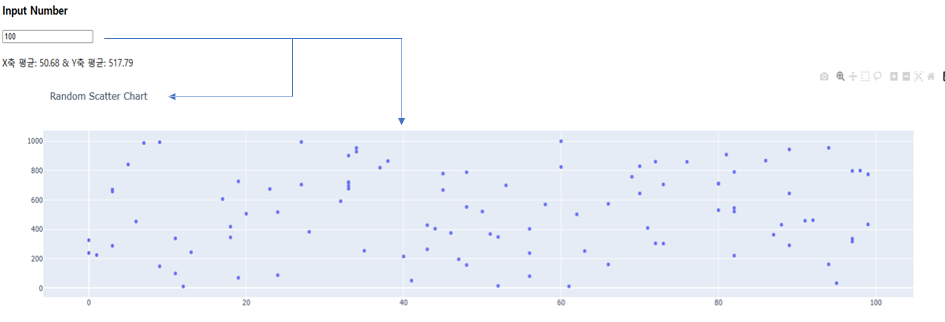

In [3]:
import dash
from dash import html, dcc 
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import numpy as np

app = dash.Dash()
app.layout = html.Div([

    html.H2(id='H2',
            children=['Input Number']),
    dcc.Input(id='Input',
              value=10),
    html.Br(),
    html.Br(),
    html.Div(id='output1',
            children=None),
    dcc.Graph(id='output2')

])

@app.callback([Output('output1', 'children'),
              Output('output2', 'figure')],
              Input('Input', 'value'))
def make_fig(num):
    num = int(num)
    ran_1 = np.random.randint(1, 500, num)
    ran_2 = np.random.randint(1, 1000, num)

    mean_1 = round(np.mean(ran_1),2)
    mean_2 = round(np.mean(ran_2),2)

    trace = go.Scatter(x=ran_1,
                       y=ran_2,
                       mode='markers')
    layout = go.Layout(title='Random Scatter Chart')
    fig = go.Figure(data=[trace], layout=layout)

    mean_result = 'X축 평균: {} & Y축 평균: {}'.format(mean_1, mean_2)

    return mean_result, fig

if __name__ == '__main__':
    app.run_server(debug=True)

## State 1

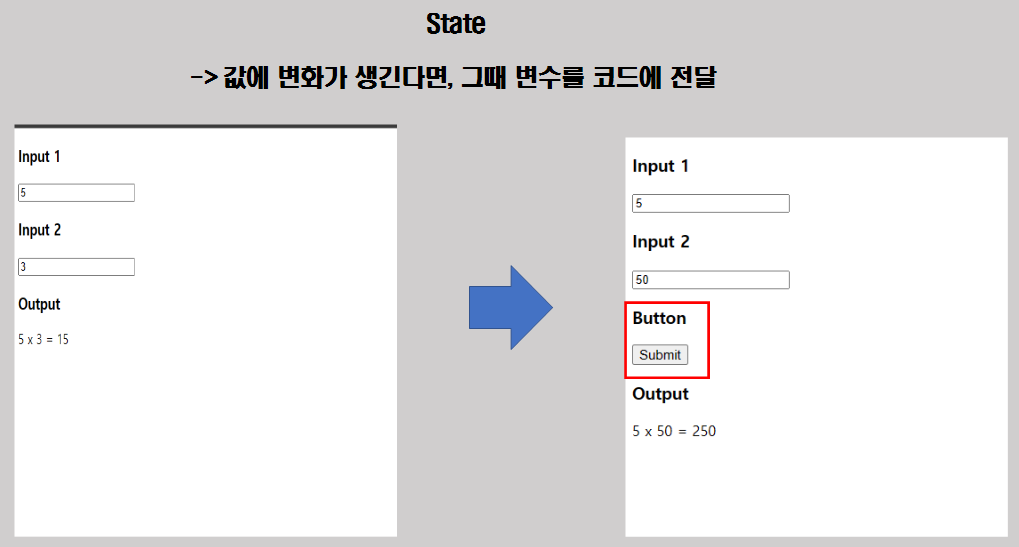

In [18]:
import dash
from dash import html, dcc
from dash.dependencies import Input, Output
from dash import State

app = dash.Dash()
app.layout = html.Div([

    # Input1
    html.Div(id='Div1',
             children=[
                html.H2(id='Input1_H2',
                        children=['Input 1']),
                dcc.Input(id='input1',
                          value='Input_Number1')
             ]),     
    
    # Input2
    html.Div(id='Div2',
             children=[
                html.H2(id='Input2_H2',
                        children=['Input 2']),
                dcc.Input(id='input2',
                          value='Input_Number2')
             ]),         
             
    # Button
    html.Div(id='Div3',
             children=[
                html.H2(id='Button_H2',
                        children=['Button']),
                html.Button(id='button',
                            n_clicks=0,
                            children=['Submit'],
                            style={'fontSize': 18}),
                            
                            ]),
    
    # Output
    html.Div(id='Div4',
             children=[
                html.H2(id='Output_H2',
                        children=['Output']),
                html.Div(id='Output1',
                         children='No Calculation Result'),
                html.Div(id='Output2',
                         children='No Clicks')
             ])

])

@app.callback(Output('Output1', 'children'),
              Output('Output2', 'children'),
              Input('button', 'n_clicks'),
              State('input1', 'value'),
              State('input2', 'value'),
              )
def out(n_clicks, input1, input2):
    input1 = int(input1)
    input2 = int(input2)
    click_result = 'Clicks : {}'.format(n_clicks)
    calc_result = '{} X {} = {}'.format(input1, input2, input1*input2)
    return click_result, calc_result


if __name__ == '__main__':
    app.run_server(debug=True)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
ValueError: invalid literal for int() with base 10: 'Input_Number1'

